## Overture Maps Lisbon Buildins

In [3]:
import numpy as np
import overturemaps
from matplotlib.colors import LogNorm
from palettable.colorbrewer.sequential import Oranges_9

from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_continuous_cmap

In [4]:
# Define the bounding box for the area of interest in Lisbon
bbox = -9.181056,38.696137,-9.095569,38.750243

In [5]:
# Read the building data within the specified bounding box using Overture Maps Python Library
table = overturemaps.record_batch_reader("building", bbox).read_all()

table = table.combine_chunks()

In [6]:
# Extract building heights from the table and handle missing values

heights = table["height"].to_numpy()
heights = np.nan_to_num(heights, nan=1)

In [7]:
# Normalize the building heights using a logarithmic scale for better visualization

normalizer = LogNorm(1, heights.max(), clip=True)
normalized_heights = normalizer(heights)

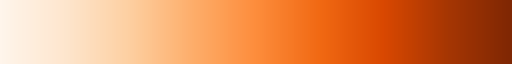

In [8]:
Oranges_9.mpl_colormap

In [9]:
# Apply a colormap to the normalized heights for color-coding
colors = apply_continuous_cmap(normalized_heights, Oranges_9)

In [10]:
# Create a PolygonLayer to visualize the buildings with their heights and colors
layer = PolygonLayer(
    # Select only a few attribute columns from the table
    table=table.select(["id", "height", "geometry", "names"]),
    extruded=True,
    get_elevation=heights,
    get_fill_color=colors,
)

c:\Users\Dee\root\Projects\dev\devGeo\venv\Lib\site-packages\lonboard\_geoarrow\ops\reproject.py:23: UserWarning: No CRS exists on data. If no data is shown on the map, double check that your CRS is WGS84.
  warn(


In [11]:
# Define the view state for the map (centered on Lisbon)

view_state = {
    "longitude": -9.181056,
    "latitude": 38.696137,
    "zoom": 12.726630492730596,
    "pitch": 59.80465353190481,
    "bearing": 13.243243243243244,
}

# Create the map with the defined layer and view state
m = Map(layer, view_state=view_state)
m

Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x00000162D5DF9D20>
[
…

This notebook is based on the brilliant work done by developmentseed:
- https://developmentseed.org/lonboard/latest/examples/overture-maps/